In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from io import StringIO
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Business Problem 01

##### A cloth manufacturing company is interested to know about the segment or attributes causes high sale

## Data Collection and Description

In [ ]:
df = pd.read_csv('Company_Data.csv')

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

#### Outlier Check

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


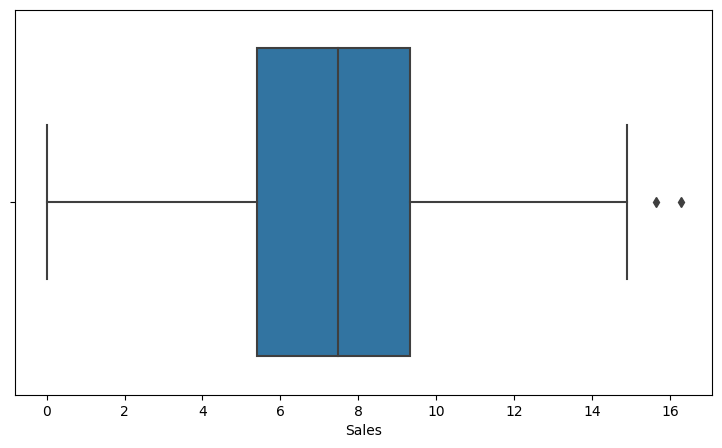

In [ ]:
ax = sns.boxplot(df1['Sales'])

Data has 2 outlier's

In [ ]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


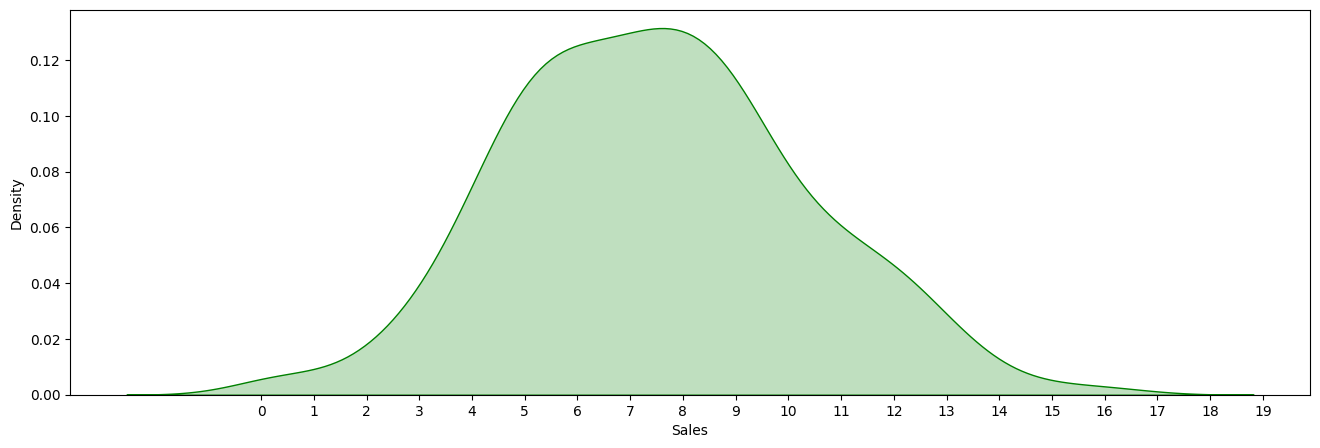

In [ ]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

#### The data is Skwed on the right
#### The data has negative Kurtosis

In [ ]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

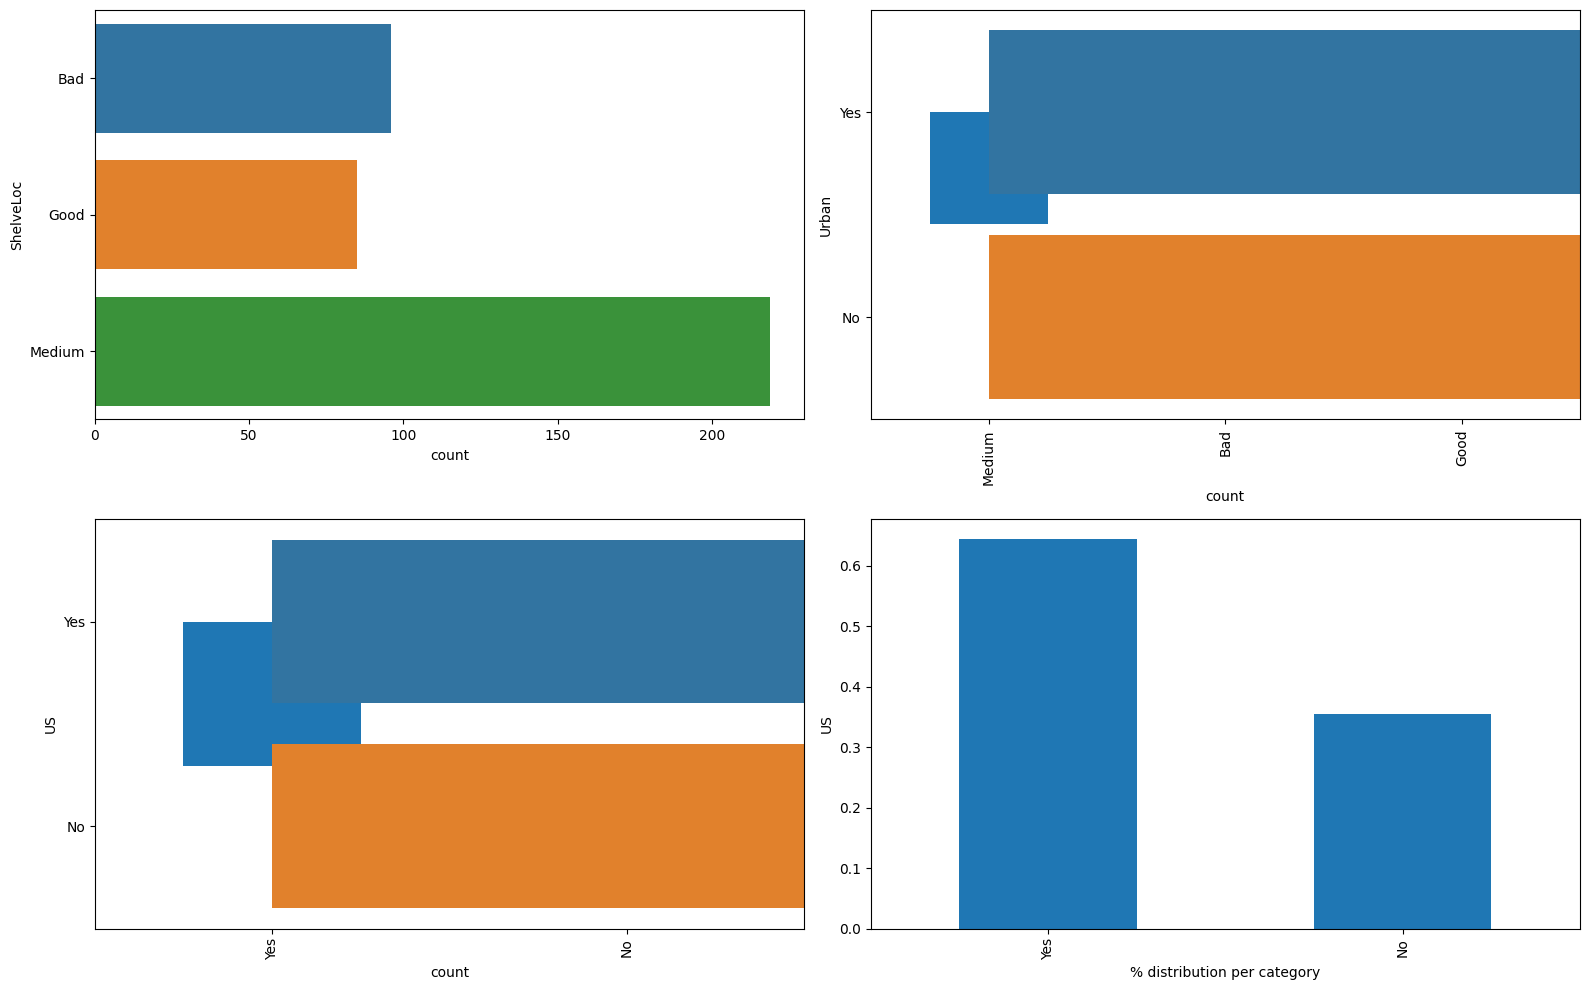

In [ ]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [ ]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

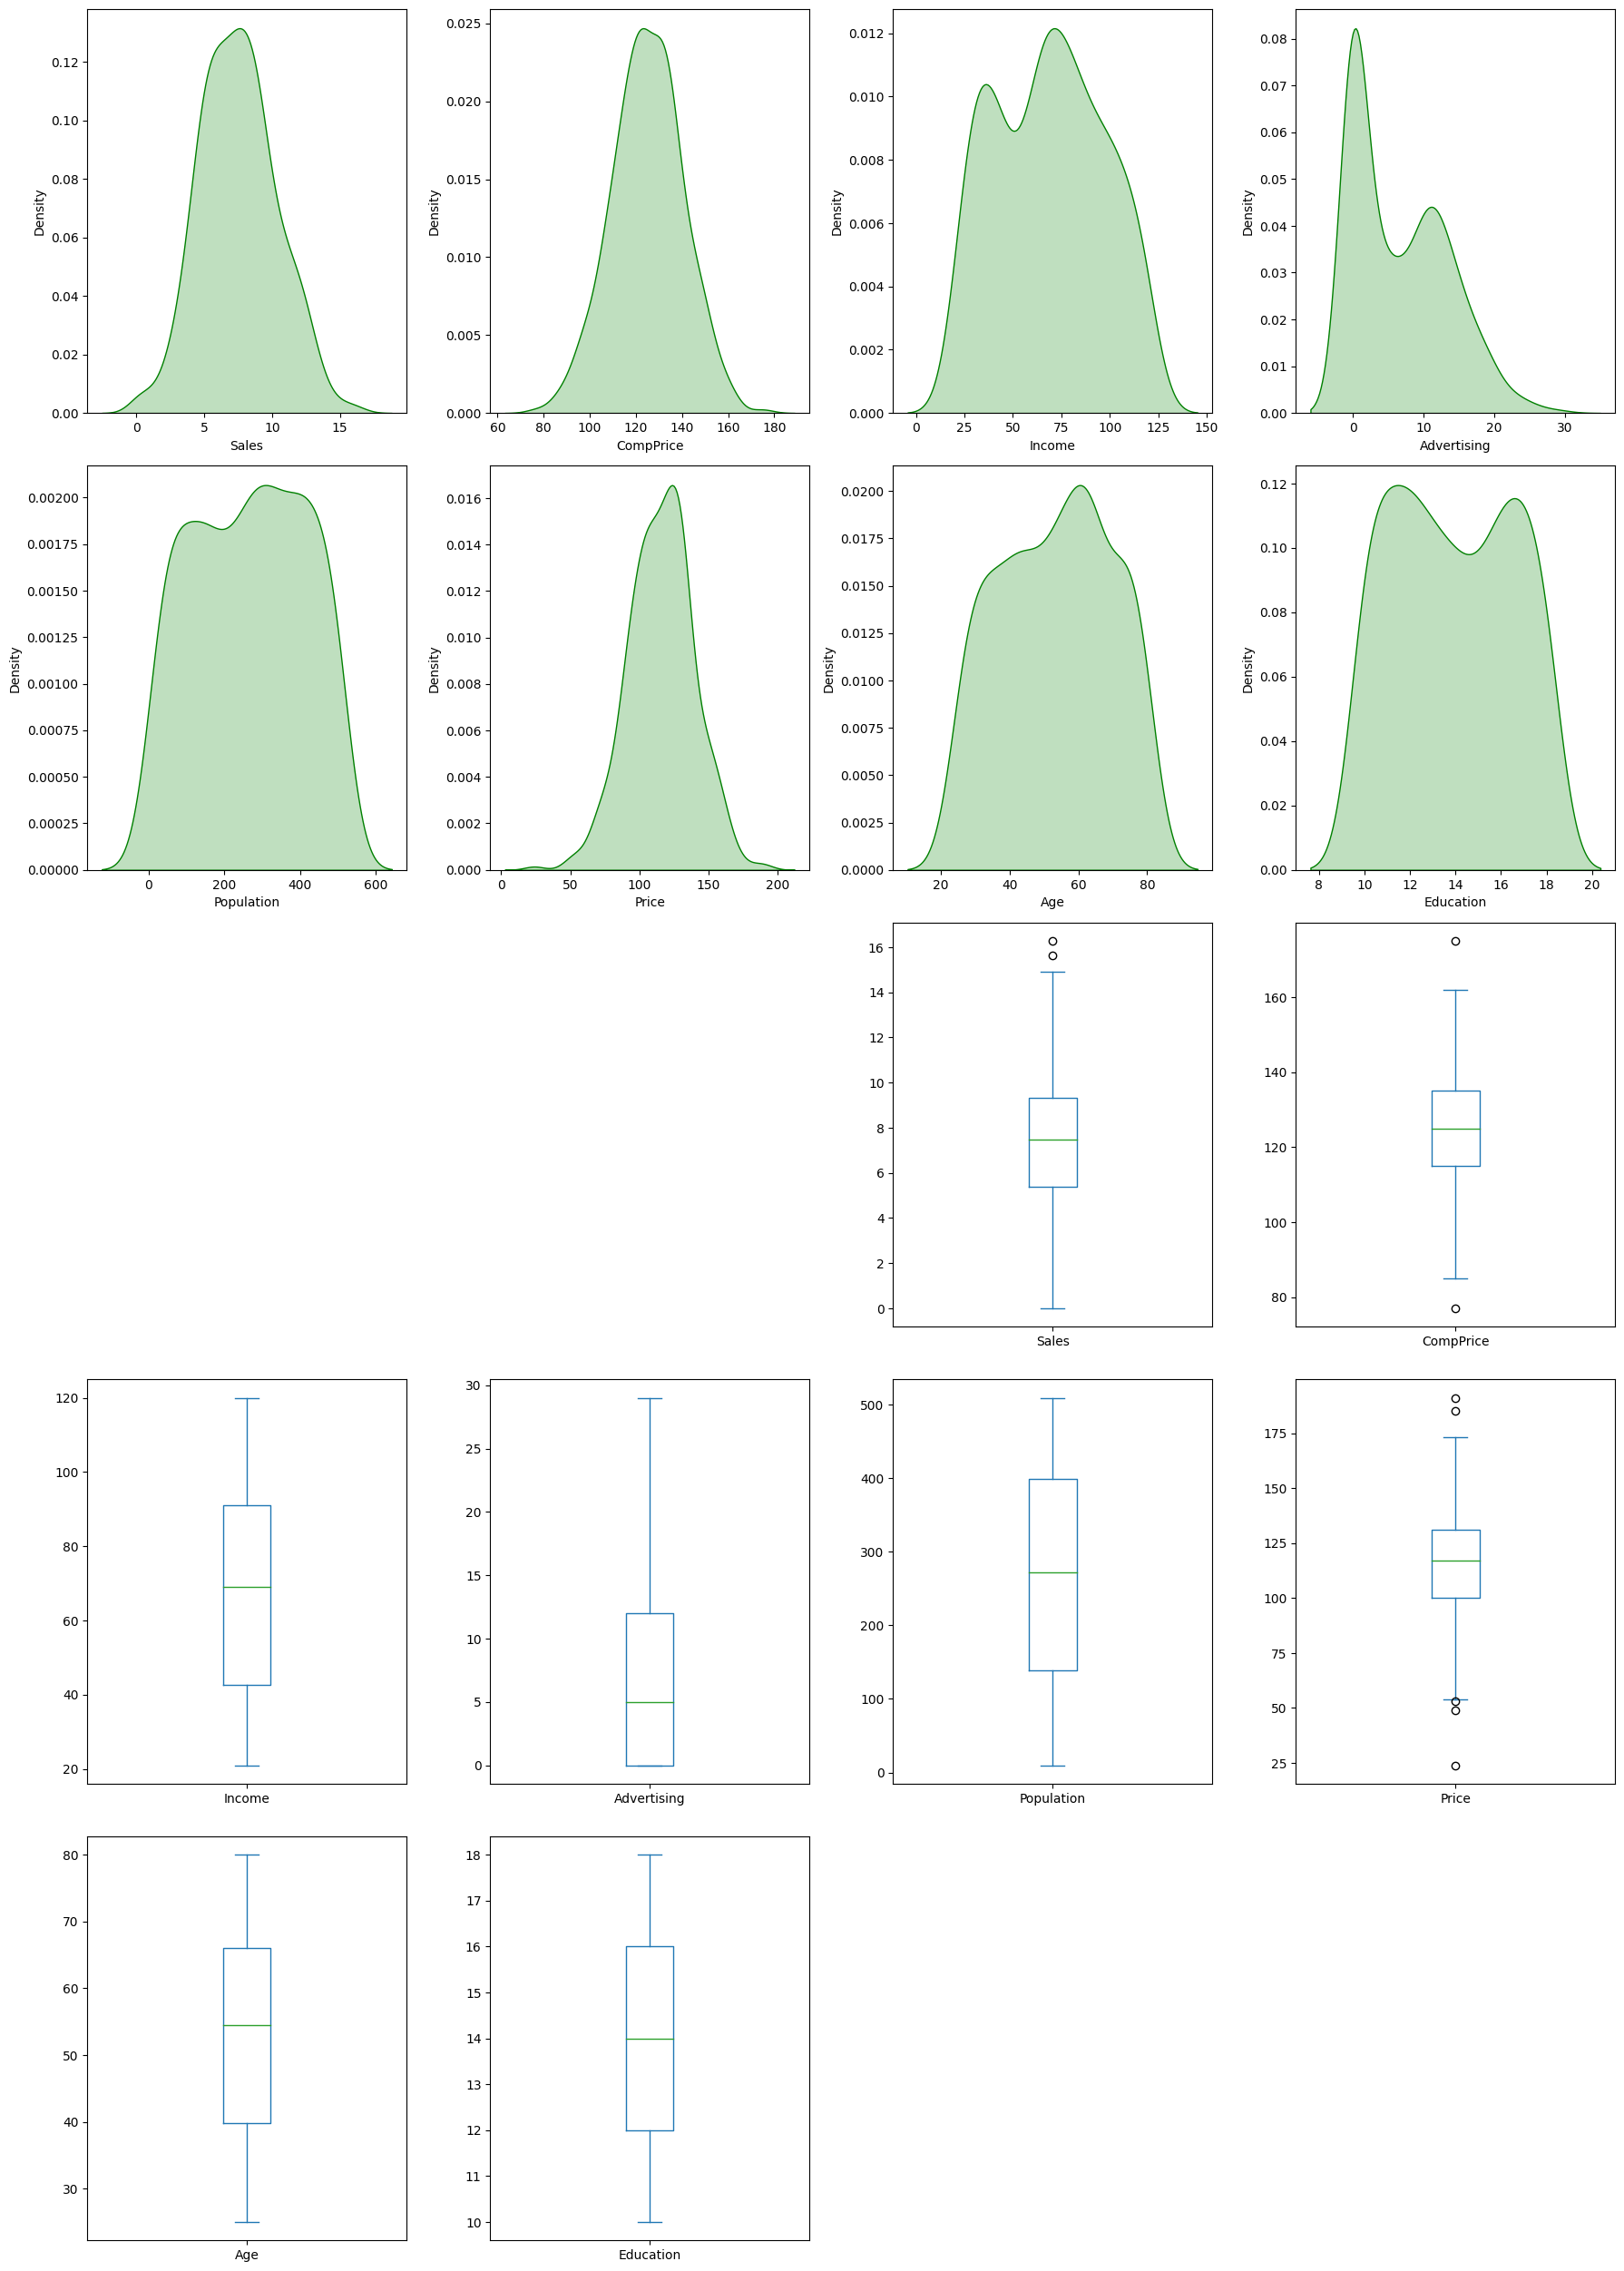

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [ ]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout()
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [ ]:
corr = df1.corr()

In [ ]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])

In [ ]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [ ]:
corr = df1.corr()

<AxesSubplot: >

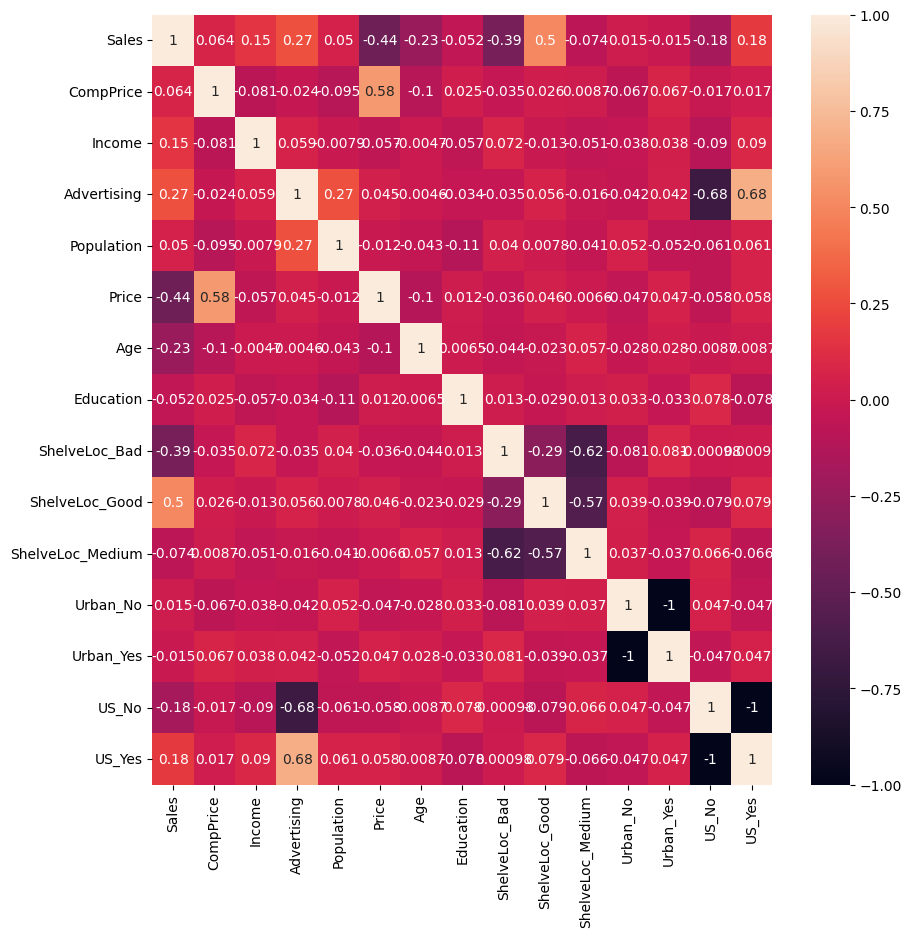

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

### Decision Tree Model

Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [ ]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)


In [ ]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [ ]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [ ]:
model = DT(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
pred_train = model.predict(x_train)

In [ ]:
accuracy_score(y_train,pred_train)

1.0

In [ ]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [ ]:
pred_test = model.predict(x_test)

In [ ]:
accuracy_score(y_test,pred_test)

0.725

In [ ]:
confusion_matrix(y_test,pred_test)

array([[30, 10],
       [12, 28]], dtype=int64)

In [ ]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [ ]:
df_t

,Actual,Predicted
168,small,small
322,large,small
197,small,small
280,small,small
18,large,large
...,...,...
23,small,small
307,small,small
344,large,large
11,large,large


In [ ]:
cols = list(df1.columns)

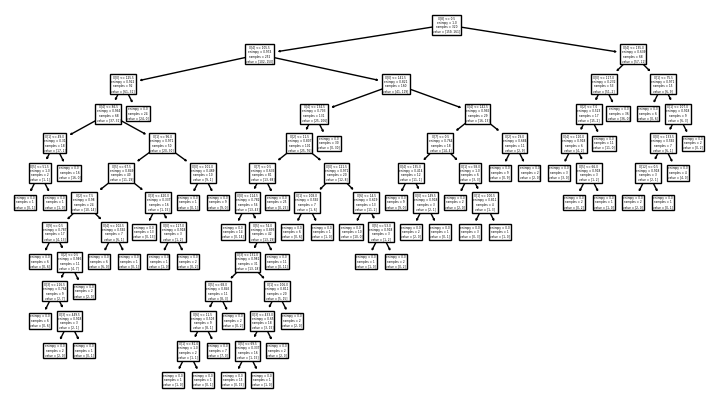

In [ ]:
from sklearn import tree
tree.plot_tree(model);

In [ ]:
model.feature_importances_

array([0.17551581, 0.12680622, 0.09707574, 0.06473512, 0.27012708,
       0.09306148, 0.02445821, 0.03277519, 0.09752661, 0.00930929,
       0.        , 0.        , 0.00860927, 0.        ])

In [ ]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [ ]:
fi

,feature,importance
4,Price,0.270127
0,CompPrice,0.175516
1,Income,0.126806
8,ShelveLoc_Good,0.097527
2,Advertising,0.097076
5,Age,0.093061
3,Population,0.064735
7,ShelveLoc_Bad,0.032775
6,Education,0.024458
9,ShelveLoc_Medium,0.009309


## As seen in the above table price is most important feature

# 2nd Business Problem
Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### Data Collection and Descripton

In [ ]:
df = pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
df1 = df.copy()

In [ ]:
df1.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [ ]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


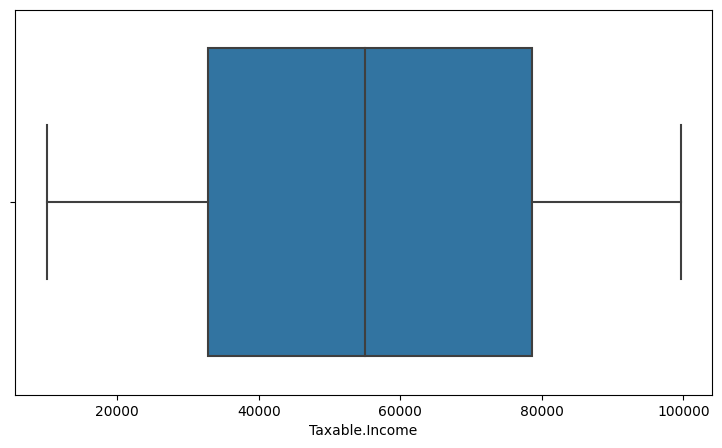

In [ ]:
# Outlier Check
ax = sns.boxplot(df1['Taxable.Income'])

There are no outliers in the data

In [ ]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


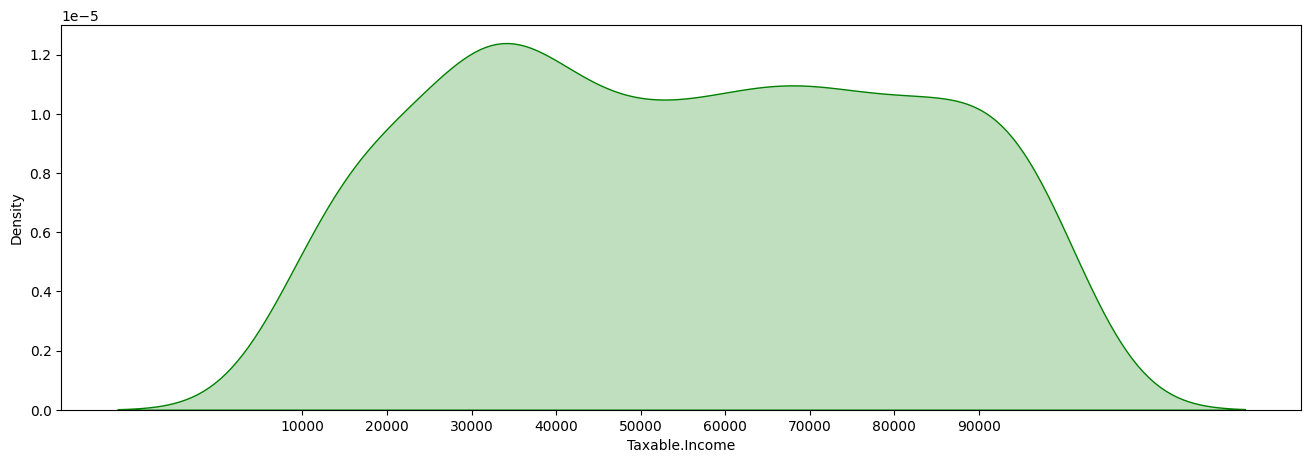

In [ ]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

###### ***The data is Skwed on the right***
###### ***The data has negative Kurtosis***

In [ ]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

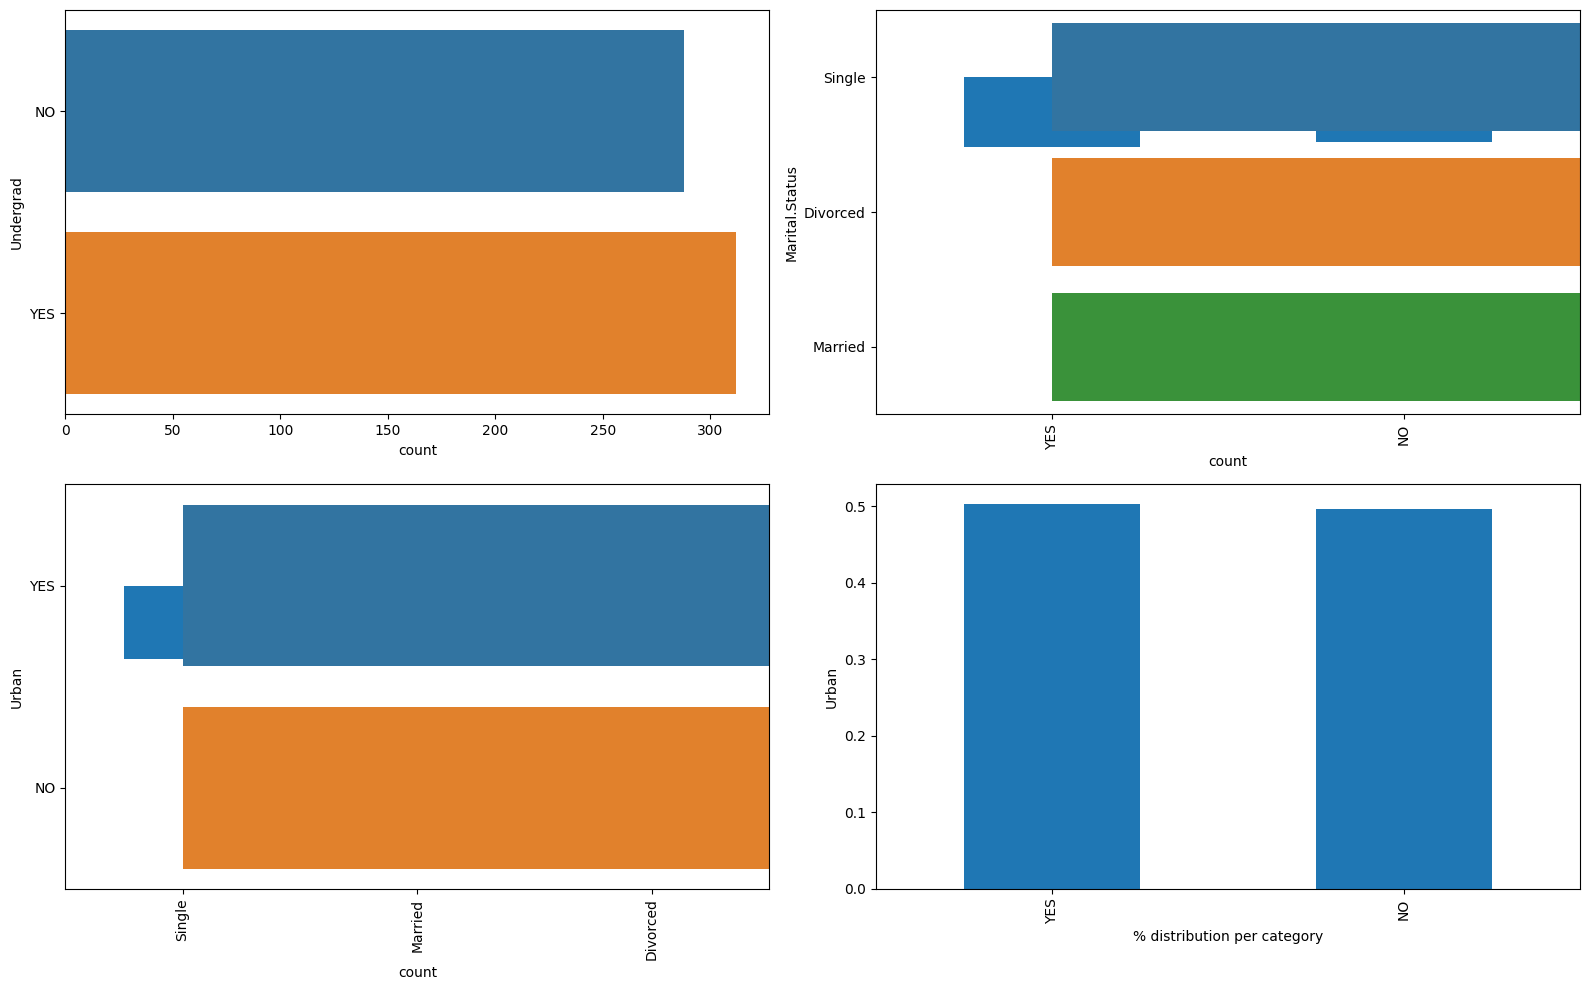

In [ ]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [ ]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

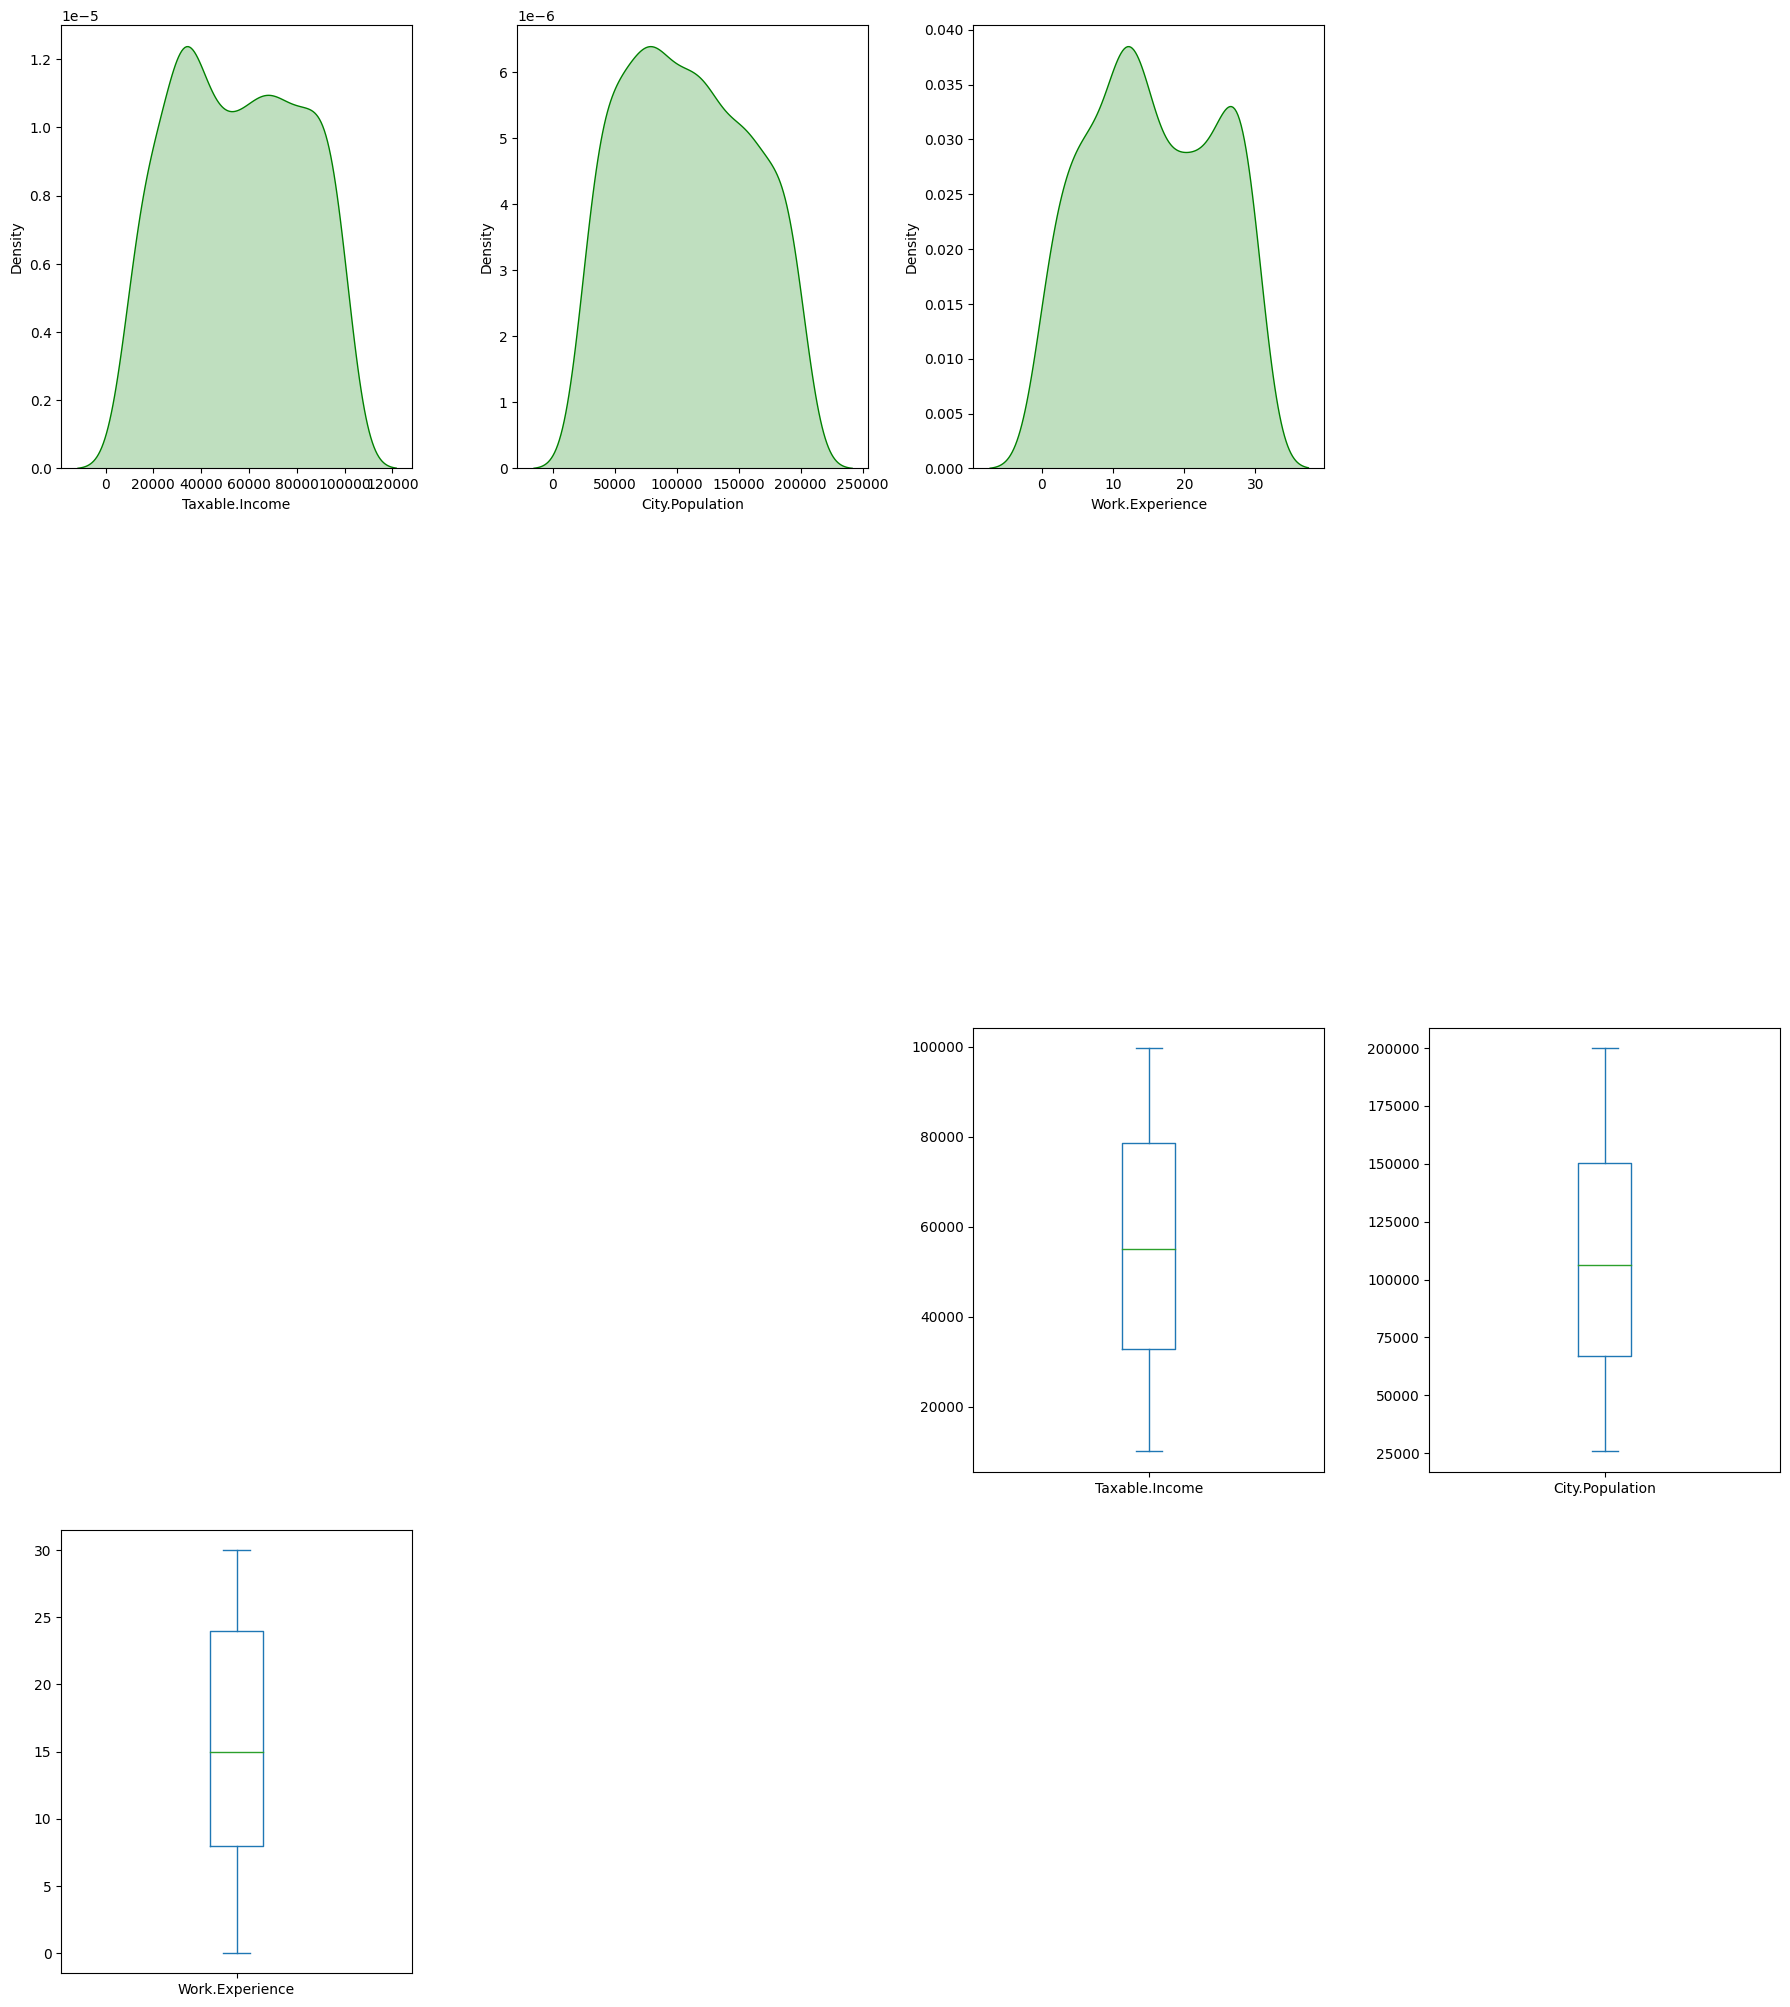

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [ ]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout()
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [ ]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

In [ ]:
corr = df1.corr()

<AxesSubplot: >

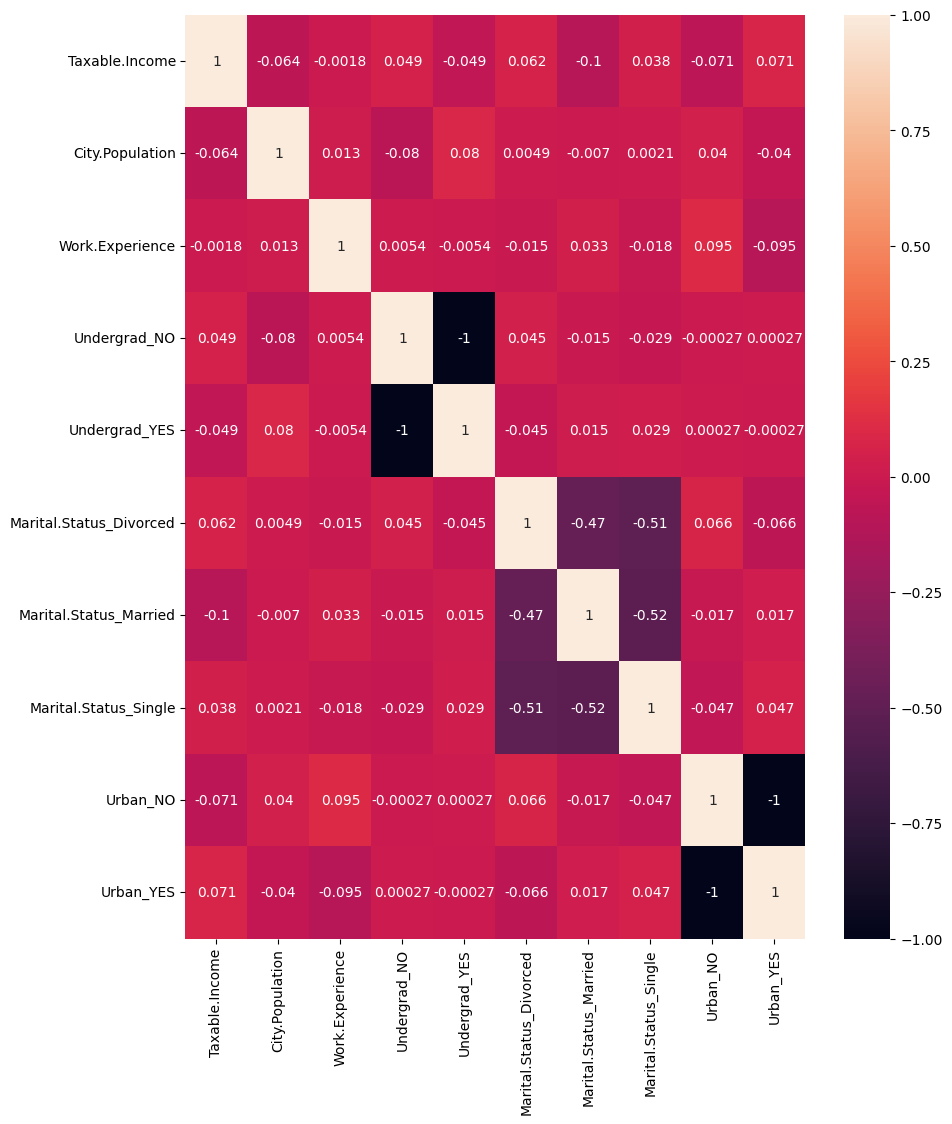

In [ ]:
plt.figure(figsize=(10,12))
sns.heatmap(corr,annot = True)

#### Decision Tree

Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [ ]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [ ]:
list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [ ]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
y_train.value_counts()

good     381
risky     99
Name: Taxable.Income, dtype: int64

In [ ]:
model1 = DT(criterion='entropy')
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
pred_train = model.predict(x_train)

In [ ]:
accuracy_score(y_train,pred_train)

1.0

In [ ]:
confusion_matrix(y_train,pred_train)

array([[381,   0],
       [  0,  99]], dtype=int64)

In [ ]:
pred_test = model.predict(x_test)

In [ ]:
accuracy_score(y_test,pred_test)

0.6666666666666666

In [ ]:
confusion_matrix(y_test,pred_test)

array([[71, 24],
       [16,  9]], dtype=int64)

In [ ]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [ ]:
df_t

,Actual,Predicted
220,good,risky
440,good,good
36,risky,good
13,good,risky
212,good,good
...,...,...
455,good,good
274,good,good
376,good,good
407,good,good


## Conclusion
##### Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 66%
##### As seen in the confusion matrix of Test data 80 instances are presdected correctly and 40 instances are not

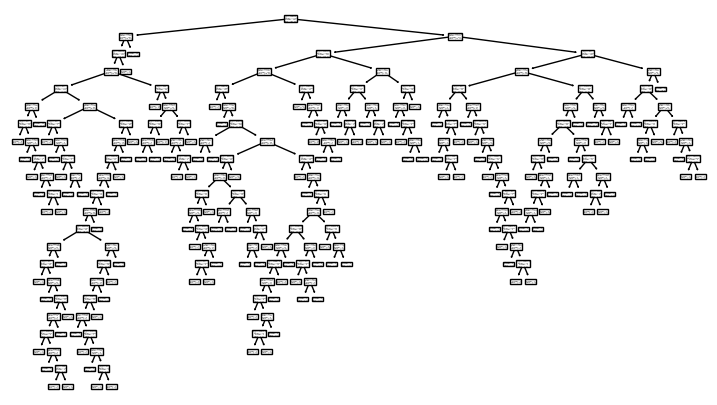

In [ ]:
tree.plot_tree(model1);

In [ ]:
model1.feature_importances_

array([0.57752348, 0.24658932, 0.0078698 , 0.03263671, 0.02378447,
       0.01944933, 0.0385274 , 0.03031538, 0.02330411])

In [ ]:
fi1 = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [ ]:
fi1

,feature,importance
0,City.Population,0.573216
1,Work.Experience,0.226381
6,Marital.Status_Single,0.051194
4,Marital.Status_Divorced,0.042507
8,Urban_YES,0.033928
2,Undergrad_NO,0.023979
3,Undergrad_YES,0.022604
7,Urban_NO,0.017267
5,Marital.Status_Married,0.008924


-------------------------------------------------
